In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# rgb
# crno belo -> 28, 28, 1 ili 1, 28, 28

In [ ]:
import keras.backend as K

In [ ]:
img_size = X_train.shape[1]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_size, img_size)
    X_test = X_test.reshape(X_test.shape[0], 1, img_size, img_size)
else:
    X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
    X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [ ]:
X_train = X_train.astype('float')
X_train /= 255

In [ ]:
X_test = X_test.astype('float')
X_test /= 255

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

In [ ]:
# 5 -> 0 0 0 0 0 1 0 0 0 0
from keras.utils import to_categorical

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.8702 - accuracy: 0.7146 - val_loss: 0.0965 - val_accuracy: 0.9728
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1956 - accuracy: 0.9422 - val_loss: 0.0628 - val_accuracy: 0.9819
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1420 - accuracy: 0.9562 - val_loss: 0.0508 - val_accuracy: 0.9843
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1134 - accuracy: 0.9662 - val_loss: 0.0456 - val_accuracy: 0.9863
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0936 - accuracy: 0.9717 - val_loss: 0.0411 - val_accuracy: 0.9879
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0898 - accuracy: 0.9739 - val_loss: 0.0383 - val_accuracy: 0.9880
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 

In [ ]:
from matplotlib import pyplot as plt

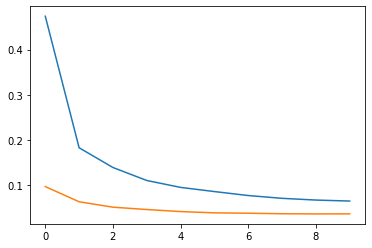

In [ ]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

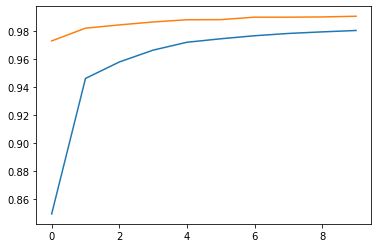

In [ ]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [ ]:
model.evaluate(X_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9899


[0.030651608482003212, 0.9898999929428101]

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted.shape

(10000, 10)

In [ ]:
import numpy as np

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_classes = np.argmax(y_predicted, axis=1)
y_predicted_classes.shape

(10000,)

In [ ]:
y_predicted_classes[1]

2

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
y_test_classes[0]

7

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test_classes, y_predicted_classes)

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    1,    1,    0,    0,    0,    1,    0,    0],
       [   2,    0, 1022,    1,    0,    0,    0,    6,    1,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    1,    1,    0],
       [   0,    1,    0,    0,  971,    0,    0,    2,    1,    7],
       [   2,    0,    0,    8,    0,  879,    1,    1,    0,    1],
       [   9,    2,    0,    0,    2,    5,  940,    0,    0,    0],
       [   0,    2,    4,    0,    0,    0,    0, 1019,    1,    2],
       [   3,    0,    3,    0,    2,    1,    1,    2,  959,    3],
       [   1,    1,    0,    1,    5,    4,    0,    4,    0,  993]])

In [ ]:
print(classification_report(y_test_classes, y_predicted_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# TRANSFER LEARNING

In [ ]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

68608000/68606236 [==============================] - 0s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


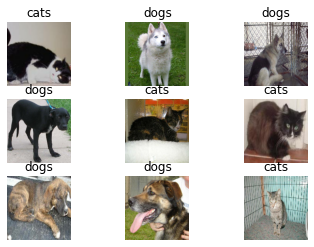

In [ ]:
class_names = train_dataset.class_names
# class_names

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
val_batches

<tf.Tensor: shape=(), dtype=int64, numpy=32>

In [ ]:
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(AUTOTUNE)
validation_dataset = validation_dataset.prefetch(AUTOTUNE)
test_dataset = test_dataset.prefetch(AUTOTUNE)

In [ ]:
data_augmentation = Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ]
)

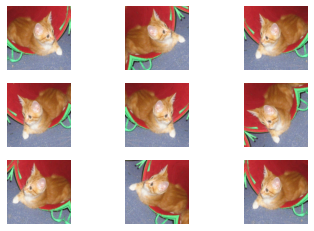

In [ ]:
for images, labels in train_dataset.take(1):
    first_image = images[0]
    for i in range(9):
        plt.subplot(3,3,i+1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
# IMG_SHAPE
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1280)              0   

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 8s 82ms/step - loss: 0.8210 - accuracy: 0.5105 - val_loss: 0.6267 - val_accuracy: 0.6213
Epoch 2/10
63/63 [==============================] - 5s 69ms/step - loss: 0.6050 - accuracy: 0.6552 - val_loss: 0.4543 - val_accuracy: 0.7525
Epoch 3/10
63/63 [==============================] - 5s 68ms/step - loss: 0.4505 - accuracy: 0.7620 - val_loss: 0.3446 - val_accuracy: 0.8639
Epoch 4/10
63/63 [==============================] - 5s 69ms/step - loss: 0.3753 - accuracy: 0.8236 - val_loss: 0.2816 - val_accuracy: 0.8923
Epoch 5/10
63/63 [==============================] - 5s 69ms/step - loss: 0.3153 - accuracy: 0.8604 - val_loss: 0.2395 - val_accuracy: 0.9084
Epoch 6/10
63/63 [==============================] - 5s 69ms/step - loss: 0.2796 - accuracy: 0.8850 - val_loss: 0.2051 - val_accuracy: 0.9270
Epoch 7/10
63/63 [==============================] - 5s 71ms/step - loss: 0.2692 - accuracy: 0.8811 - val_loss: 0.1821 - val_accuracy: 0.9443
Epoch 8/10
63

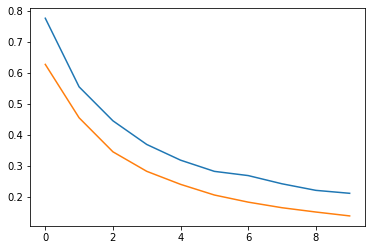

In [ ]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

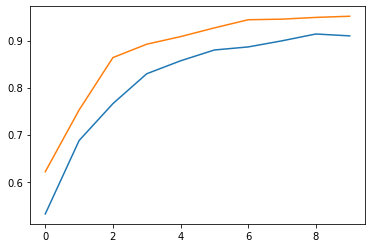

In [ ]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [ ]:
model.evaluate(test_dataset)

6/6 [==============================] - 1s 51ms/step - loss: 0.1399 - accuracy: 0.9323


[0.13994233310222626, 0.9322916865348816]